<a href="https://colab.research.google.com/github/lizbethpacheco6761-gif/CAR-SALES-REPORT/blob/main/CAR_SALES_REPORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction**

For my final project, I decided to find a dataset that was interesting to me.  I chose this "Cars Sales Report" from Kaggle.  I currently work in a dealership, more specifically a Hyundai one.  My role there is the inventory clerk, so I stock in the new cars (Hyundai models) & we also purchase a few used cars of different makes and models monthly.   But I thought it would be interesting to analyze sales from multiple dealers between 01/2022 to 12/2023. This dataset seems to have dealers from all over the United States.

In this analysis, I want to focus on the following things.


*   Customer Demographics
*   Vehicle Pricing


*   Vehicle Preferences
*   Is there a relationship between income and car preference?









In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview
I have imported the dataset & have displayed the top five rows.
The columns show the car ID, date of sale, customer, gender, annual income, dealership, make and model of vehicles, engine, transmission, color, price in USD, dealer number, body type, phone number, and the region of the dealer.

In [20]:
# Importing the dataset
df = pd.read_csv('/content/Car_Sales.xlsx_-_car_data[1].csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


The code below shows us that there are 16 columns with 23906 rows.
There is just one of the columns that is missing data in one row (Customer Name).

### **Data Cleaning**

In [21]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Only one null value, will drop this row since it won't affect data analysis.

In [22]:
# Dropping the row with null data
df = df.dropna(subset=['Customer Name'])

In [23]:
# Checking for duplicates in the dataset
df.duplicated().sum()

np.int64(0)

### **Data Manipulation**



In [24]:
# Finding the highest price vehicles
sorted_cars = df.sort_values(by='Price ($)', ascending=False)
sorted_cars.head()



,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7068,C_CND_007069,10/20/2022,Dariel,Male,1388000,Star Enterprises Inc,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85800,99301-3882,Passenger,6544024,Aurora
17129,C_CND_017130,8/26/2023,Akiva,Male,5046000,Rabun Used Car Sales,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85601,85257-3102,Passenger,6296288,Austin
13605,C_CND_013606,5/10/2023,Gabriella,Male,1036000,Hatfield Volkswagen,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85600,99301-3882,Passenger,7918569,Pasco
358,C_CND_000359,2/6/2022,Matthew,Male,1326000,Star Enterprises Inc,Toyota,RAV4,Overhead Camshaft,Manual,Black,85600,99301-3882,Hatchback,8706152,Pasco
11330,C_CND_011331,2/14/2023,Zachary,Female,1185000,Hatfield Volkswagen,Cadillac,Eldorado,Overhead Camshaft,Manual,Black,85500,99301-3882,Passenger,7551848,Pasco


The code above shows us the top five most expensive vehicles in this dataset.
Four out of the five are Cadillac Eldorados, going up to $85,800!

In [25]:
# Finding the lowest annual income of the customers

sorted_income = df.sort_values(by='Annual Income', ascending=True)
sorted_income.head(1)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
23451,C_CND_023452,12/24/2023,Andy,Male,10080,Pitre Buick-Pontiac-Gmc of Scottsdale,Infiniti,I30,Overhead Camshaft,Manual,Red,22801,99301-3882,Hardtop,8231348,Pasco


We were able to find the customer with the lowest income in the dataset. Andy was still able to purchase an Infiniti I30 that retailed for $22,801.

In [26]:
# Finding the vehicle makes that have the lowest price on average
avg_price_by_company = df.groupby('Company')['Price ($)'].mean().sort_values(ascending=True)
avg_price_by_company.head()

,Price ($)
Company,
Hyundai,19386.234848
Jeep,21057.338843
Porsche,22674.894737
Audi,22851.790598
Acura,24758.561684


With the code above, we are able to see that what makes have the lowest average retail price.  Hyundai models are the least expensive averaging at $19,386.

### **Data Visualization**

/tmp/ipython-input-3261135471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=gender_colors)


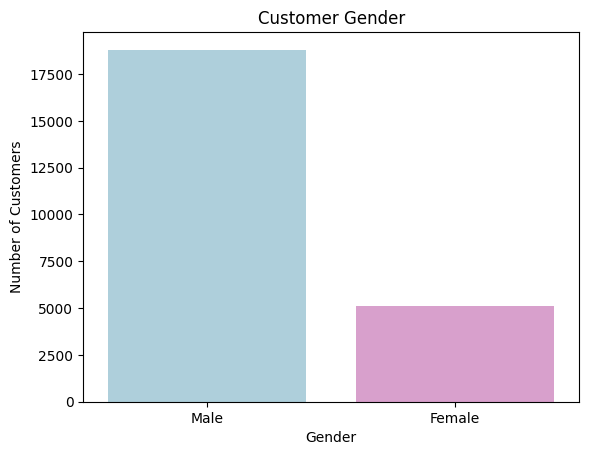

In [27]:
# Gender of customers

gender_colors = {
    'Male': '#a6d3e3',
    'Female': '#E197D1'
}
sns.countplot(data=df, x='Gender', palette=gender_colors)
plt.title('Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

There is a clear discrepancy in the genders when it comes to purchasing vehicles from this dataset.  Between 2022 to 2023, males purchased more than double of the vehicles female customers did.  

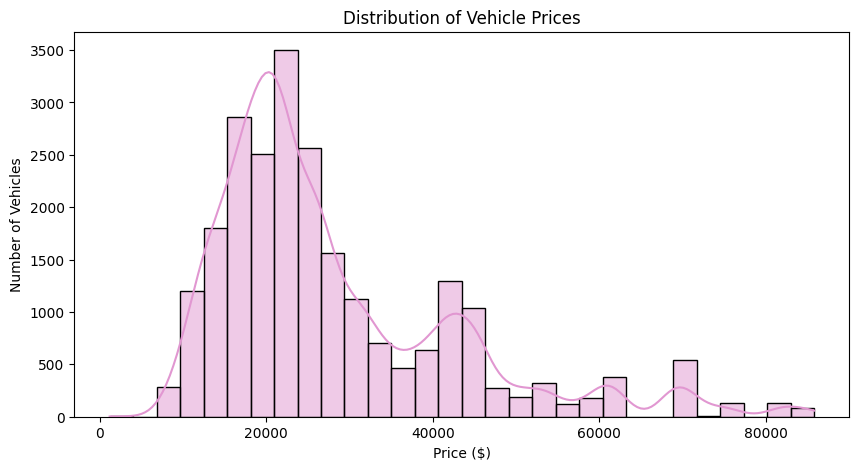

In [28]:
# Distribution of vehicle prices

plt.figure(figsize=(10,5))
sns.histplot(df['Price ($)'], bins=30, kde=True, color='#E197D1')
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Vehicles')
plt.show()


With the histogram above, we can see that average prices are around $20,000.  There are a few luxury vehicles that were purchased causing this to be right-skewed.

/tmp/ipython-input-1795108307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Color', palette='RdPu')


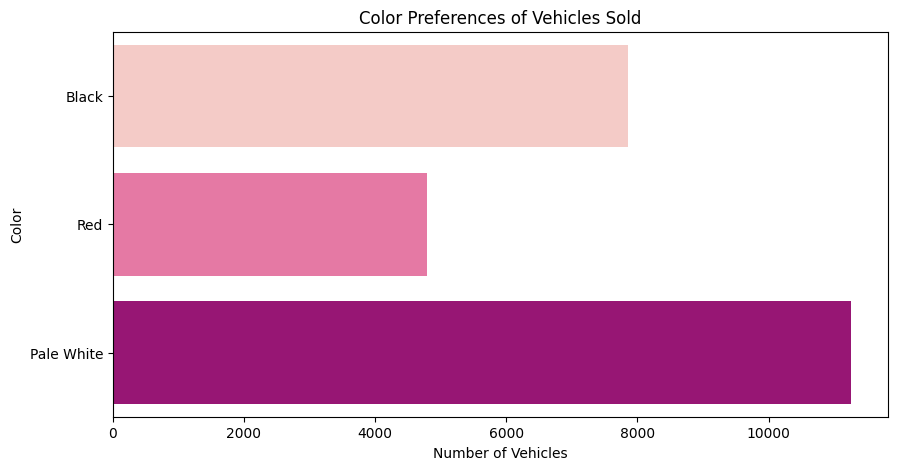

In [29]:
# Color preferences of vehicles sold

plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Color', palette='RdPu')
plt.title('Color Preferences of Vehicles Sold')
plt.xlabel('Number of Vehicles')
plt.ylabel('Color')
plt.show()

Above, we can see the the three colors of vehicles that were purchased. Black and white vehicles tend to sell more, the customers like to stick to classic colors.  Red is the most bold option of the colors, but white is by far the most popular.

### **Statistical Analysis**

In [30]:
df[['Annual Income','Price ($)']].describe().round(2)

,Annual Income,Price ($)
count,23905.00,23905.00
mean,830846.60,28089.54
std,720020.79,14788.59
min,10080.00,1200.00
25%,386000.00,18001.00
50%,735000.00,23000.00
75%,1176000.00,34000.00
max,11200000.00,85800.00


The average income of the customers is around \$830,847 with incomes ranging from \$10,080 all the way to $11,200,000.

There is also a wide range of prices of the vehicles, \$28,090 being the average.  The least expensive vehicle was sold for only \$1,200 & the most expensive one was sold for $85,800.

In [31]:
# Correlation annual income & price
correlation = df['Annual Income'].corr(df['Price ($)'])
print(correlation)


0.012075321898201432


There is no correlation between the customer's income and what vehicle they purchase.